## Monte Carlo integration

In [29]:
import numpy as np
import scipy.stats as stats

# Parametri della distribuzione gaussiana
mu = 0      # Media
sigma = 1   # Deviazione standard
N = 100000  # Numero di campioni

# Generazione dei campioni dalla distribuzione normale (vera PDF)
xi = np.random.normal(mu, sigma, N)

# Funzione integranda f(x) = x^3
def f(x):
    return x**3

# Densità di probabilità della vera distribuzione normale
def p_gauss(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Consideriamo solo i campioni positivi (dominio dell'integrale)
xi_pos = xi[xi >= 0]

# Stima dell'integrale con la correzione per la distribuzione normale completa
integral = np.mean(f(xi_pos) / p_gauss(xi_pos, mu, sigma))

print("Stima dell'integrale:", integral)
print("Valore esatto:", 2 * sigma**4)


Stima dell'integrale: 249.14933237681237
Valore esatto: 2


In [30]:
import numpy as np
import scipy.stats as stats
from tqdm import tqdm
#uso la chi-quadro perché è definita solo per valori positivi
# Parametro della distribuzione chi-quadro (4 gradi di libertà)
k = 4
sigma = 5
N = 100000000  # Numero di campioni
M = 100      # Numero di blocchi (batch)
chunk_size = N // M  # Numero di campioni per blocco

# Generiamo campioni dalla distribuzione chi-quadro con 4 gradi di libertà
xi = np.random.chisquare(df=k, size=N) ** 0.5 * sigma  # Adattiamo al nostro caso

# Funzione integranda f(x) = x^3
def f(x):
    return x**3 * np.exp(-x**2 / (2 * sigma**2))

# Densità di probabilità della distribuzione chi-quadro trasformata
def p_chi2(x, k, sigma):
    return (2 ** (-k / 2) / (sigma ** k * stats.gamma(k / 2).pdf(1))) * x ** (k - 1) * np.exp(-x ** 2 / (2 * sigma ** 2))

estimates = []
for i in tqdm(range(M), desc="Elaborando blocchi"):
    xi = np.random.chisquare(df=k, size=chunk_size) ** 0.5 * sigma  # Campioni per il blocco corrente
    estimates.append(np.mean(f(xi) / p_chi2(xi, k, sigma)))

# Stima dell'integrale con correzione per la distribuzione di campionamento
integral = np.mean(f(xi) / p_chi2(xi, k, sigma))



print("Stima dell'integrale:", integral)
print("Valore esatto:", 2 * sigma**4)


Elaborando blocchi: 100%|██████████| 100/100 [00:22<00:00,  4.53it/s]


Stima dell'integrale: 919.6986029286055
Valore esatto: 1250


Iterating over sigma: 100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


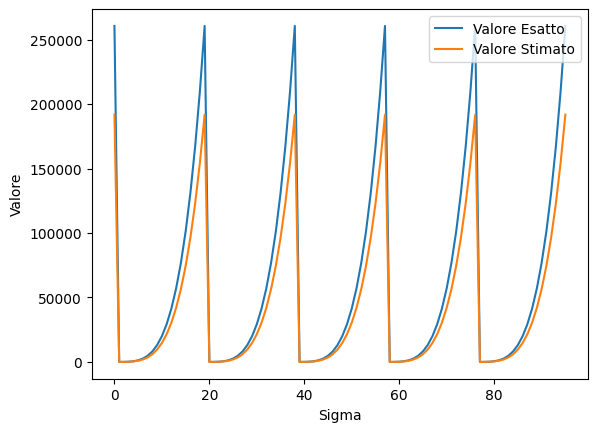

In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 4
N = 10000000  # Numero di campioni
sigma_values = [1, 3, 5, 7, 9]  # Valori di sigma per cui stimare l'integrale

# Funzione integranda: f(x) = x^3 * exp(-x^2/(2σ^2))
def f(x, sigma):
    return x**3 * np.exp(-x**2 / (2 * sigma**2))

# Densità di probabilità per la distribuzione chi-quadro trasformata:
def p_chi2(x, k, sigma):
    # La densità derivata considerando xi = sigma * sqrt(chi2) 
    return (2 ** (-k / 2) / (sigma ** k * stats.gamma(k / 2).pdf(1))) * x ** (k - 1) * np.exp(-x**2 / (2 * sigma**2))

for sigma in tqdm(range(1, 20), desc='Iterating over sigma'):
    # Generiamo campioni adattati per il valore corrente di sigma:
    xi = np.random.chisquare(df=k, size=N) ** 0.5 * sigma
    
    # Stima dell'integrale con importance sampling:
    estimated = np.mean(f(xi, sigma) / p_chi2(xi, k, sigma))
    exact = 2 * sigma**4
    real_values = np.append(real_values, exact)
    estimated_values = np.append(estimated_values, estimated)

#print(real_values, estimated_values)

plt.plot(real_values, label='Valore Esatto')
plt.plot(estimated_values, label='Valore Stimato') 
plt.xlabel('Sigma')
plt.ylabel('Valore')
plt.legend()
plt.show()


Iterating over points: 100%|██████████| 1000/1000 [00:03<00:00, 329.62it/s]


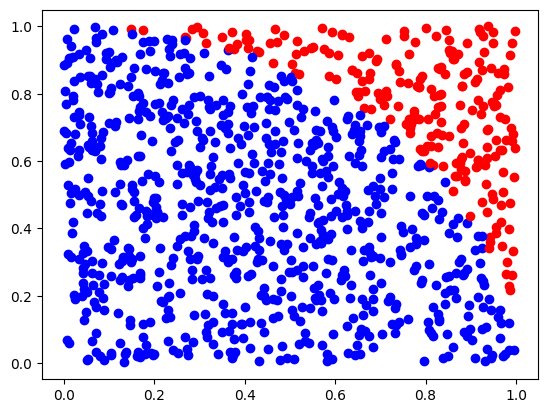

3.0485811992812457


In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm

r=1
for i in tqdm(range(1000), desc='Iterating over points'):
    blue = np.random.uniform(0, r)
    red = np.random.uniform(0, r)
    if blue**2 + red**2 <= 1:
        plt.scatter(blue, red, color='blue')
    else:
        plt.scatter(blue, red, color='red')
plt.show()
pi=4*blue/(blue+red)
print(pi)